In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('carprice-data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Make the data consistent
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Create a python list of all columns with strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
# And make them consistent too
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## **EXPLORATORY DATA ANALYSIS**

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

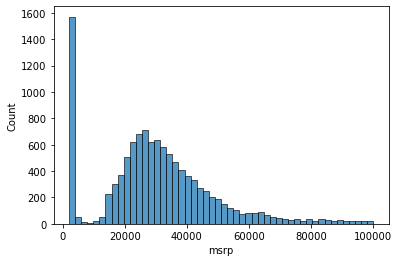

In [10]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [11]:
# Adds 1 to all values then takes log, to avoid log(0)
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

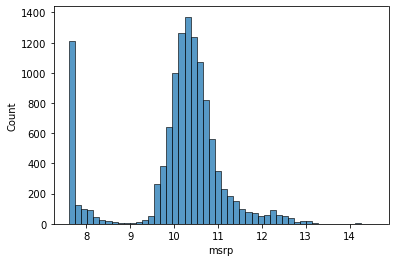

In [12]:
sns.histplot(price_logs, bins=50)

**Setting up validation framework**

In [7]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train + n_val + n_test)
n_train, n_val, n_test

11914


(7150, 2382, 2382)

In [8]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [9]:
idx = np.arange(n)

In [10]:
np.random.seed(2)
np.random.shuffle(idx)

In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [14]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [21]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
        
    return pred

In [22]:
xi = [453, 11, 86]
w0 = 7.17
w = [.01, .04, .002]

linear_regression(xi)

12.312

In [23]:
np.expm1(12.312)

222347.2221101062

## **Linear Regression Vector Form**

In [24]:
def linear_regression(xi):
    return w0 + np.dot(xi, w)
linear_regression(xi)

12.312000000000001

In [25]:
w_new = [w0] + w

In [26]:
def linear_regression(xi):
    xi = [1] + xi
    return np.dot(xi, w_new)
linear_regression(xi)

12.312

In [27]:
def linear_regression(X):
    return X.dot(w_new)

## **Training a lin reg model**

In [28]:
def train_lin_reg(X, y):
    pass

In [29]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [30]:
ones = np.ones(X.shape[0])

X = np.column_stack([ones, X])

In [31]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [32]:
# Gram Matrix
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [33]:
XTX_inv = np.linalg.inv(XTX)

In [34]:
w_full = XTX_inv.dot(X.T).dot(y)
w0 = w_full[0]
w = w_full[1:]

w0, w

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [22]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
train_lin_reg(X, y)

LinAlgError: Singular matrix

## **Car price baseline model**

In [23]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [24]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


In [25]:
X_train = df_train[base].values

In [26]:
train_lin_reg(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [27]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [28]:
X_train = df_train[base].fillna(0).values

In [29]:
w0, w = train_lin_reg(X_train, y_train)

In [30]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

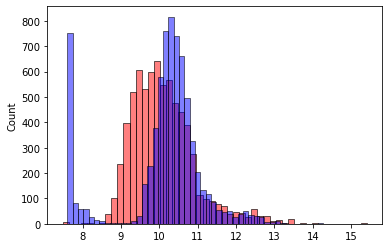

In [31]:
sns.histplot(y_pred, color='red', bins=50, alpha=.5)
sns.histplot(y_train, color='blue', bins=50, alpha=.5)

## **RMSE**

In [32]:
def rmse(y, y_pred):
    se = (y-y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
rmse(y_train, y_pred)

0.7554192603920132

## **Validating the model**

In [34]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_lin_reg(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [35]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [36]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130158

## **Simple Feature Engineering**

In [37]:
2017 - df_train['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [38]:
def prepare_X(df):
    df['age'] = 2017 - df.year
    features  = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)

In [40]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
dtype: object

In [41]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058312

<AxesSubplot:ylabel='Count'>

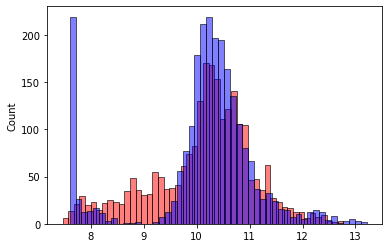

In [42]:
sns.histplot(y_pred, color='red', bins=50, alpha=.5)
sns.histplot(y_val, color='blue', bins=50, alpha=.5)

## **Categorical Variables**

In [43]:
for v in [2, 3, 4]: 
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)

In [44]:
del df_train['num_doors_2']
del df_train['num_doors_3']
del df_train['num_doors_4']

In [45]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features  = base + ['age']
    
    for v in [2, 3, 4]: 
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [46]:
X_train = prepare_X(df_train)

In [47]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.515799564150199

In [48]:
makes = list(df.make.value_counts().head().index)

In [49]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features  = base + ['age']
    
    for v in [2, 3, 4]: 
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for v in makes: 
        df['num_make_%s' % v] = (df.make == v).astype(int)
        features.append('num_make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.507603884955604

In [51]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

In [52]:
categories = {}

for c in categorical_columns:
    categories[c] = list(df_train[c].value_counts().head().index)

In [53]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features  = base + ['age']
    
    for v in [2, 3, 4]: 
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [54]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

182.73573716890579

In [56]:
w0

161102181138203.72

## **Regularization**

In [66]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00001],
]

X = np.array(X)
X

array([[4.     , 4.     , 4.     ],
       [3.     , 5.     , 5.     ],
       [5.     , 1.     , 1.     ],
       [5.     , 4.     , 4.     ],
       [7.     , 5.     , 5.     ],
       [4.     , 5.     , 5.00001]])

In [67]:
XTX = X.T.dot(X)
XTX

array([[140.     , 111.     , 111.00004],
       [111.     , 108.     , 108.00005],
       [111.00004, 108.00005, 108.0001 ]])

In [68]:
XTX_inv = np.linalg.inv(XTX)

In [69]:
y = [1, 2, 3, 1, 2, 3]

In [70]:
XTX_inv.dot(X.T).dot(y)

array([ 4.13192996e-01, -1.74517471e+05,  1.74517392e+05])

In [72]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [75]:
XTX = XTX + 0.01 * np.eye(3)

In [76]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [89]:
def train_lin_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [90]:
# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.46081585834928845

## **Tuning the Model**

In [91]:
for R in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    # Training part
    X_train = prepare_X(df_train)
    w0, w = train_lin_reg(X_train, y_train, r=R)

    # Validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

10 161102181138203.72 182.73573716890579
10 6.124399850818048 0.46081530840546797
10 7.128217859489913 0.4608153638982293
10 7.131053040544675 0.46081585834928845
10 7.11838140721054 0.46082082860143553
10 7.000232412617868 0.46087365491211807
10 6.250747847529395 0.4615812838275061
10 4.729512585677929 0.4726098772668522


In [92]:
r = 0.0001

# Training part
X_train = prepare_X(df_train)
w0, w = train_lin_reg(X_train, y_train, r=r)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print(r, w0, score)

0.0001 7.128217859489913 0.4608153638982293


## **Using the model**

In [109]:
df_full_train = pd.concat([df_train, df_val])

In [110]:
df_full_train = df_full_train.reset_index(drop=True)

In [111]:
X_full_train = prepare_X(df_full_train)

In [112]:
y_full_train = np.concatenate([y_train, y_val])

In [113]:
w0, w = train_lin_reg(X_full_train, y_full_train, r=0.001)
w

array([ 1.80193325e-03,  1.26575152e-01, -6.78607851e-03,  7.75903988e-03,
       -5.33226047e-05, -9.73063830e-02, -1.27241590e+00, -1.30599158e+00,
       -9.95969235e-01, -6.27479239e-02,  1.82139250e-01,  2.83073997e-02,
        1.29063713e-02, -1.32624473e-01, -2.69110365e-01, -6.50985188e-01,
       -3.21721816e-01, -3.55424919e-01, -3.51215976e-01, -6.61058964e-01,
       -1.19526867e-01, -5.15904765e-01, -6.99730799e-01, -3.25276635e-01,
        1.80631192e+00,  1.75062561e+00,  1.82819813e+00,  1.79006659e+00,
       -5.47616410e-02,  1.19033258e-01, -2.65289007e-02,  7.42029253e-03,
       -7.49066970e-03,  2.42691854e+00,  2.35931700e+00,  2.38908621e+00,
       -1.47584145e-01, -2.46551739e-02,  1.81542645e-01,  3.55084073e-01,
       -2.79089708e-01])

In [114]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.46007539708984035

In [116]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [117]:
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)

In [119]:
y_small = w0 + X_small.dot(w)
y_small = y_small[0]
np.expm1(y_small)

41459.33585228836

In [120]:
np.expm1(y_test[20])

35000.00000000001